In [1]:
import torch
import torchvision 
import torchvision.datasets as datasets
import torchvision.transforms as T
import numpy as np
from torch_geometric.data import InMemoryDataset, Data
from torch_geometric.loader import DataLoader

import matplotlib.pyplot as plt
import skimage as ski

Available datasets:

RGB color:
+ CIFAR10  (cifar10_slic)
+ CIFAR100 (cifar100_slic)
+ STL10  (stl10_slic)
+ StanfordCars (stanfordcars_slic)

Grayscale:
+ MNIST (mnist_slic)
+ FashionMNIST (fashion_mnist_slic)

In [2]:
import mnist_slic 
import fashion_mnist_slic

import cifar10_slic
import cifar100_slic
import stl10_slic

In [68]:
test_ds  = fashion_mnist_slic.SuperPixelGraphFashionMNIST(root=None, 
                                               n_segments=75,
                                               compactness=0.1,
                                               features=None,
                                               graph_type='16NNSpatial',
                                               slic_method='SLIC0',
                                               train=False,
                                               pre_select_features=False)

Selected features for 16NNSpatial graph:
	+ avg_color
	+ std_deviation_color
	+ centroid
	+ std_deviation_centroid
FashionMNIST Loaded.
Average number of nodes: 78.0985 with standard deviation 1.9314755369923795
Average number of edges: 2499.152 with standard deviation 61.807217183756144


In [41]:
import geo_ds_slic
test_ds  = geo_ds_slic.SuperPixelGraphGeo(n_segments=75,
                                          compactness=0.1,
                                          features=None,
                                          graph_type='RAG',
                                          slic_method='SLIC0',
                                          pre_select_features=False)

Selected features for RAG graph:
	+ avg_color
	+ std_deviation_color
	+ centroid
	+ std_deviation_centroid


Processing...


: 

: 

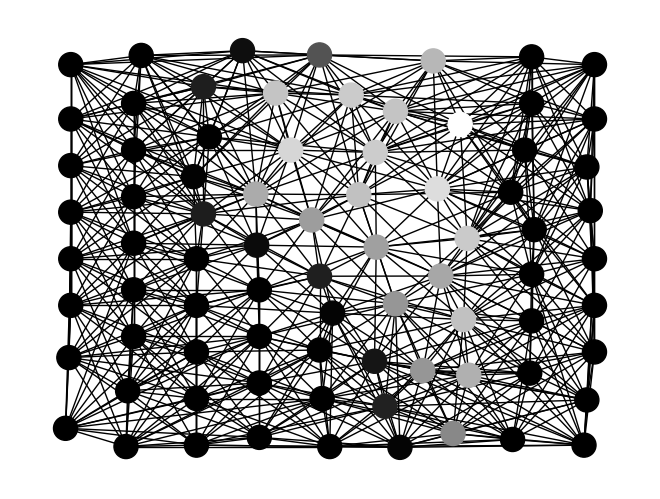

In [69]:
import networkx as nx
from torch_geometric.utils import to_networkx

index = 0
g = test_ds[index]
pos = g.pos.numpy()
features = g.x.numpy()

nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0]
nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap='gray')


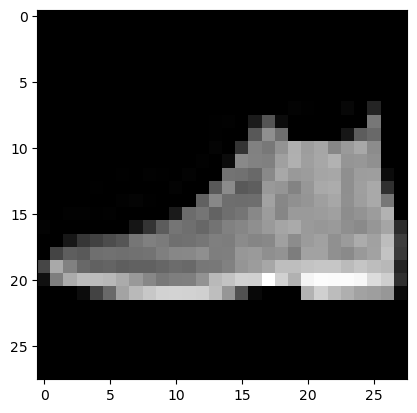

In [57]:
og_ds = datasets.FashionMNIST(root='fashion_mnist/test', train=False)
img, _ = og_ds[index]
plt.imshow(img, cmap='gray')

Feature building

In [2]:
from compute_features import color_features, grayscale_features
import networkx as nx
from torch_geometric.utils import to_networkx

Requuired pre-processing for grayscale

In [3]:

ds = datasets.MNIST(root="mnist/test", train=False, download=True, transform=T.ToTensor())

In [4]:
img, y = ds[67]
_, dim0, dim1 = img.shape
img_np = img.view(dim0, dim1).numpy()
n_segments = 75
compactness = 0.1
features, edge_index, s = grayscale_features(img_np, n_segments, 6, 0)
print(features.shape, edge_index.shape, s.shape)

(80, 7) (2, 160) (28, 28)


Segmentation result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


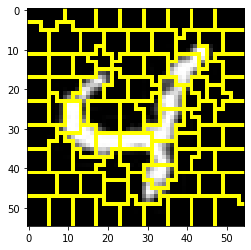

In [27]:
plt.imshow(ski.segmentation.mark_boundaries(img_np, s, mode='subpixel'))

Graph

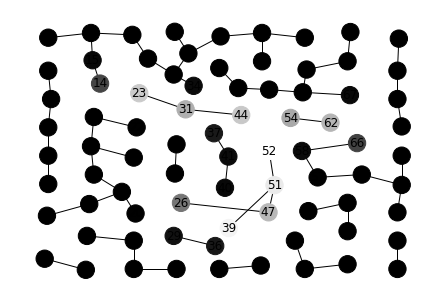

In [5]:
pos = features[:, 2:4]
g = Data(x=torch.from_numpy(features).to(torch.float), edge_index=torch.from_numpy(edge_index).to(torch.long), pos=torch.from_numpy(pos).to(torch.float), y=y)
nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0]
nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap="gray", with_labels=True)

Required pre-processing for RGB images

In [35]:
ds = datasets.CIFAR10(root="cifar10/test", train=False, download=True, transform=T.ToTensor())

Files already downloaded and verified


float32


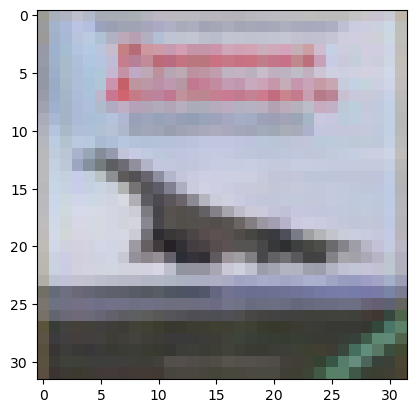

In [37]:
img = ds[3][0]
img_np = torch.stack([img[0], img[1], img[2]], dim=2).numpy()
print(img_np.dtype)
plt.imshow(img_np)
n_segments = 75
compactness = 0.01
features, edge_index, s = color_features(img_np, n_segments, 8, 0)

Segmentation result

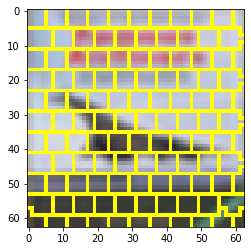

In [9]:

plt.imshow(ski.segmentation.mark_boundaries(img_np, s, mode='subpixel'))

Graph

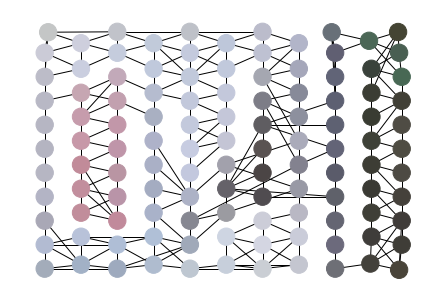

In [10]:

pos = features[:, 6:8]
g = Data(x=torch.from_numpy(features).to(torch.float), edge_index=torch.from_numpy(edge_index).to(torch.long), pos=torch.from_numpy(pos).to(torch.float), y=y)

nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0:3]
nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color)

P
(817, 580, 3)
0.0 1.0


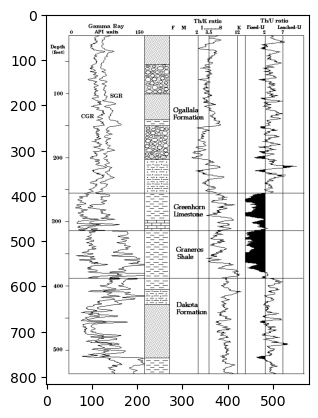

In [4]:
import csv
import re
from skimage.io import imread
from skimage.color import gray2rgb
from PIL import Image
from PIL import PngImagePlugin
LARGE_ENOUGH_NUMBER = 100000
PngImagePlugin.MAX_TEXT_CHUNK = LARGE_ENOUGH_NUMBER * (1024**2)

maior_img = '/1a5/sha1-1a54dbbcd92b447e8894bfe61c8acf7f75a0d618.jpg'
menor_img = '/049/sha1-04949cd016fd4c5a1dff0cb6d7e5375c21da6c5e.jpg'
maior_largura = '/2cd/sha1-2cda5f01b524d0c530e4fa043b333d84872070f5.jpg'
menor_largura = '/cb3/sha1-cb3486e085ff851e7b32124121a4e94105d13ee1.jpg'

index_path = '/home/julia/Documents/ds/labels/v14-one-tree.csv'
img_dir = '/home/julia/Documents/ds/images/by-hash'

suspeitos = [
            '/0cd/sha1-0cdb17ab7c2770a1694770c4f8e1c9efad0e62b7.png',
            '/0cd/sha1-0cdcdf65011da5978d0f9cf18d10074d7d75c987.png',
            '/0ce/sha1-0ce0d17b6f2c7b9957e3580f2a8c945d6ed89a30.gif',
            '/0ce/sha1-0ce226f2f2476943871d030f37aadd1276a19d93.png',
            '/0ce/sha1-0ce63dd50b1cd406be17323eb4793f419a1080ee.jpg',
            '/0ce/sha1-0ce77f5d81ea7d8483769b2a870e1a6ac1fe678e.png',
            '/0ce/sha1-0ce9d2d3b1c879544fb98d889eb39832576fd121.jpg',
            '/0cf/sha1-0cf2b63b5ca30565c1c64c979747c959a177e1fd.jpg',
            '/0cf/sha1-0cf3db370da0d5ec1c5d0d0fd0eded31fefcab5b.jpg',
            '/0cf/sha1-0cfa0e165531a6cbb4b731c03c61c5cb537dd338.jpg',
            '/0cf/sha1-0cfcc2f9670cc369391a17d007ff1ff18cf06304.png',
            '/0cf/sha1-0cfcf550cc018b5782cb8d83c664bccd9b29a9fd.jpg',
            '/0d0/sha1-0d018c66bf2a146562b43fda1d5c7513199fd0dd.jpg',
            '/0d0/sha1-0d01e40580f5b9d492314788096fc11a10f53d4f.png',
            '/0d0/sha1-0d0702adbd672ddf03a64035e1543640950965c6.png',
            '/0d0/sha1-0d072e622254fd55b1368425133d1949969cf284.jpg',
            '/0d0/sha1-0d07648fe294fd1a5d39b65f6e94b54f69682c51.gif'
            ]

img_name = '/dc1/sha1-dc17116fa28c9673909ab9cd5808a6808af9ab10.png'
img_name = '/0ce/sha1-0ce0d17b6f2c7b9957e3580f2a8c945d6ed89a30.gif'
with open(index_path, newline='') as index_file:
    with Image.open(img_dir + img_name) as img_pil:
        if img_pil.mode != 'RGB':
            print(img_pil.mode)
            img_pil = img_pil.convert('RGB')
        img_np = np.asarray(img_pil, dtype=np.float32)/255.0
print(img_np.shape)
print(np.min(img_np), np.max(img_np))
plt.imshow(img_np)



In [ ]:
n_segments = 10
compactness = 0.01
features, edge_index, s = color_features(img_np, n_segments, 0, 0)
plt.imshow(ski.segmentation.mark_boundaries(img_np, s))


: 

: 

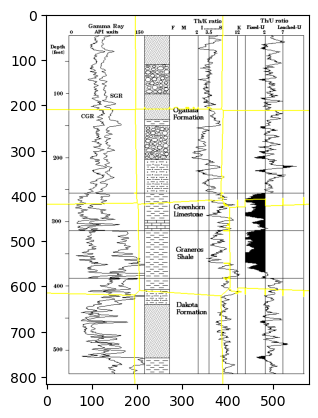

In [6]:
from skimage.segmentation import slic
s = slic(img_np, n_segments=10, slic_zero=True, convert2lab=True)
plt.imshow(ski.segmentation.mark_boundaries(img_np, s))

nan


ValueError: RGBA values should be within 0-1 range

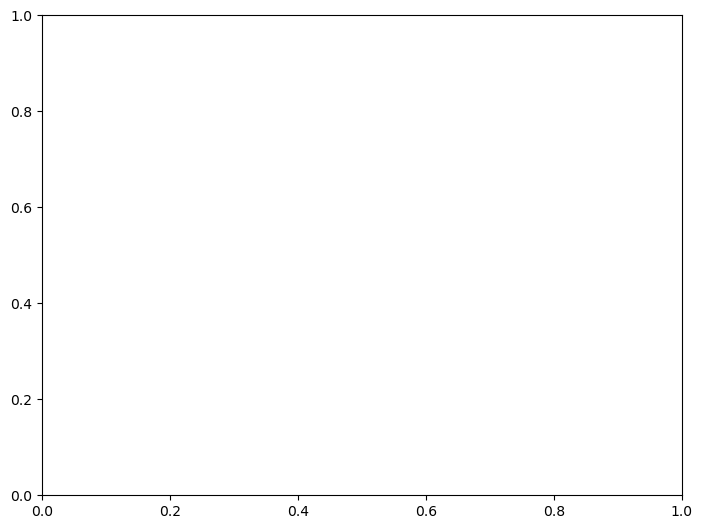

In [15]:
pos = features[:, 6:8]
g = Data(x=torch.from_numpy(features).to(torch.float), edge_index=torch.from_numpy(edge_index).to(torch.long), pos=torch.from_numpy(pos).to(torch.float))

nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0:3]
print(np.max(nx_color))

nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color)

In [7]:
import PIL
from PIL import features
PIL.features.pilinfo()

--------------------------------------------------------------------
Pillow 9.3.0
Python 3.10.6 (main, Nov  2 2022, 18:53:38) [GCC 11.3.0]
--------------------------------------------------------------------
Python modules loaded from /home/julia/.local/lib/python3.10/site-packages/PIL
Binary modules loaded from /home/julia/.local/lib/python3.10/site-packages/PIL
--------------------------------------------------------------------
--- PIL CORE support ok, compiled for 9.3.0
--- TKINTER support ok, loaded 8.6
--- FREETYPE2 support ok, loaded 2.12.1
--- LITTLECMS2 support ok, loaded 2.13.1
--- WEBP support ok, loaded 1.2.4
--- WEBP Transparency support ok
--- WEBPMUX support ok
--- WEBP Animation support ok
--- JPEG support ok, compiled for libjpeg-turbo 2.1.4
--- OPENJPEG (JPEG2000) support ok, loaded 2.5.0
--- ZLIB (PNG/ZIP) support ok, loaded 1.2.11
--- LIBTIFF support ok, loaded 4.4.0
--- RAQM (Bidirectional Text) support ok, loaded 0.9.0, fribidi 1.0.8, harfbuzz 5.3.1
*** LIBIMAGEQU